# Importing and understanding data

## Importing libraries

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore")

## Importing data from Cab_Data 

In [4]:
cab_data_df = pd.read_csv('Cab_Data.csv')
cab_data_df.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


## Understanding Cab_Data

In [5]:
# Finding missing data
cab_data_df.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [6]:
# Information of Cab_Data
cab_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [7]:
# Statistics of Cab_Data
cab_data_df.describe(include = 'all')

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392,359392,359392.000000,359392.000000,359392.000000
unique,NaN,NaN,2,19,NaN,NaN,NaN
top,NaN,NaN,Yellow Cab,NEW YORK NY,NaN,NaN,NaN
freq,NaN,NaN,274681,99885,NaN,NaN,NaN
mean,1.022076e+07,42964.067998,NaN,NaN,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,NaN,NaN,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,NaN,NaN,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,NaN,NaN,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,NaN,NaN,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,NaN,NaN,32.960000,583.660000,413.683200


In [8]:
# Data types of Cab_data
cab_data_df.dtypes

# Changing data type of 'Date of Travel'
dates = cab_data_df['Date of Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in dates]
cab_data_df['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')



## Unique data categories in Cab_Data

In [9]:
# Unique categories from column 'Company'
cab_data_df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [10]:
# Unique categories from column 'City'
cab_data_df['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

## Importing data from City 

In [11]:
city_df = pd.read_csv('City.csv')
city_df.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


## Understanding data from City 

In [12]:
city_df.isna().sum()

City          0
Population    0
Users         0
dtype: int64

In [13]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [14]:
city_df.describe(include = 'all')

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


Need to change data under 'Population' and 'Users' to integers

In [15]:
# Changing data type of Population to integer
city_df['Population'] = city_df['Population'].str.replace(',', '').astype(int)

# Changing data type of Users to interger 
city_df['Users'] = city_df['Users'].str.replace(',', '').astype(int)

In [16]:
# Checking modified columns data type
city_df.dtypes

City          object
Population     int32
Users          int32
dtype: object

## Importing data from Transaction ID

In [17]:
transaction_id_df = pd.read_csv('Transaction_ID.csv')
transaction_id_df.head(5)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


## Understanding data from Transaction ID

In [18]:
transaction_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [19]:
transaction_id_df.describe(include = 'all')

,Transaction ID,Customer ID,Payment_Mode
count,4.400980e+05,440098.000000,440098
unique,NaN,NaN,2
top,NaN,NaN,Card
freq,NaN,NaN,263991
mean,1.022006e+07,23619.513120,NaN
std,1.270455e+05,21195.549816,NaN
min,1.000001e+07,1.000000,NaN
25%,1.011004e+07,3530.000000,NaN
50%,1.022006e+07,15168.000000,NaN
75%,1.033008e+07,43884.000000,NaN


## Importing data from Customer ID 

In [20]:
customer_id_df = pd.read_csv('Customer_ID.csv')
customer_id_df.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


## Understanding data from Customer ID

In [21]:
customer_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [22]:
customer_id_df.describe(include = 'all')

,Customer ID,Gender,Age,Income (USD/Month)
count,49171.000000,49171,49171.000000,49171.000000
unique,NaN,2,NaN,NaN
top,NaN,Male,NaN,NaN
freq,NaN,26562,NaN,NaN
mean,28398.252283,NaN,35.363121,15015.631856
std,17714.137333,NaN,12.599066,8002.208253
min,1.000000,NaN,18.000000,2000.000000
25%,12654.500000,NaN,25.000000,8289.500000
50%,27631.000000,NaN,33.000000,14656.000000
75%,43284.500000,NaN,42.000000,21035.000000


In [23]:
customer_id_df.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


# Exploration and visualisation of data

In order to visualize the various datasets as a whole, they will be merged as one dataset

In [24]:
merged_df = cab_data_df.merge(transaction_id_df, on= 'Transaction ID').merge(customer_id_df, on ='Customer ID').merge(city_df, on = 'City')
merged_df.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


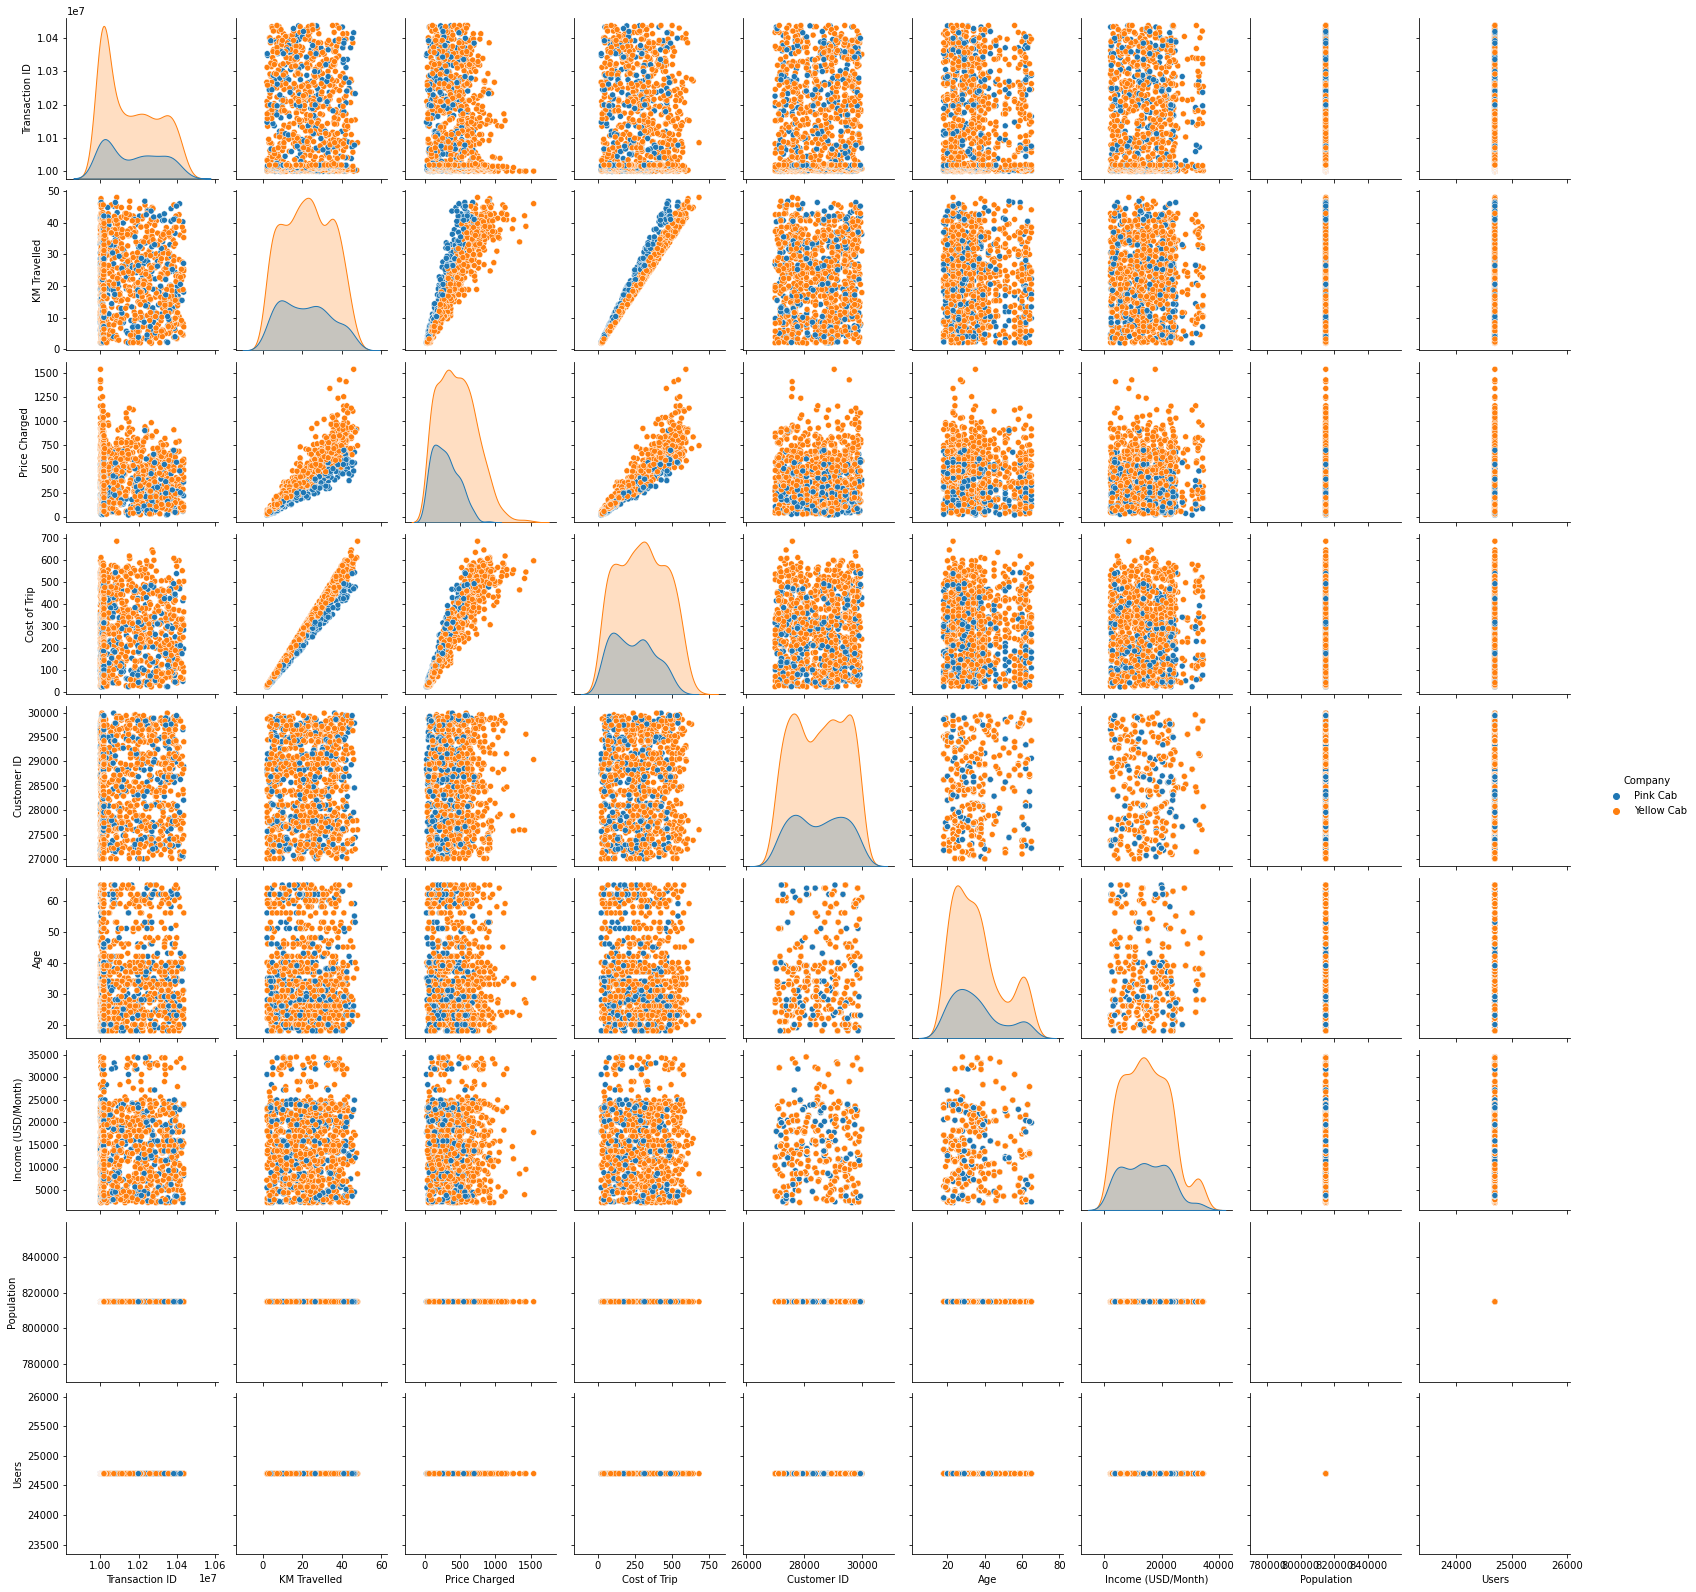

In [25]:
sns.pairplot(merged_df.head(1000), hue = 'Company')

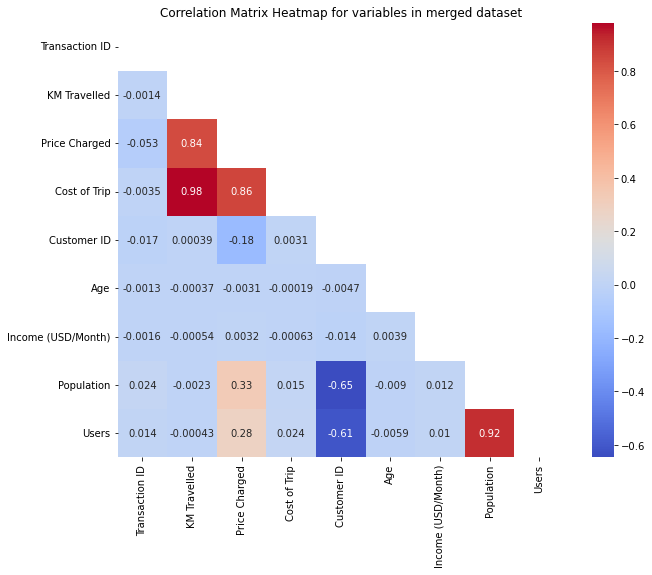

In [26]:
# correlation matrix
correlation_matrix = merged_df.corr()

# Upper correlation matrix to avoid repeat
upper_matrix = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=upper_matrix)
plt.title('Correlation Matrix Heatmap for variables in merged dataset')
plt.show()


From this heatmap, the following variables can be deemed stongly correlated:

- Price Charged, KM Travelled and Cost of Trip
- Users and Populations

Thus, an exploration done on the data of these variables will be done.

# Data exploration

## User demographic

As shown from the above graph, quite a significant percentage of users take the yellow cab as opposed to the pink cab with yellow cab being over 75% of the cab market.

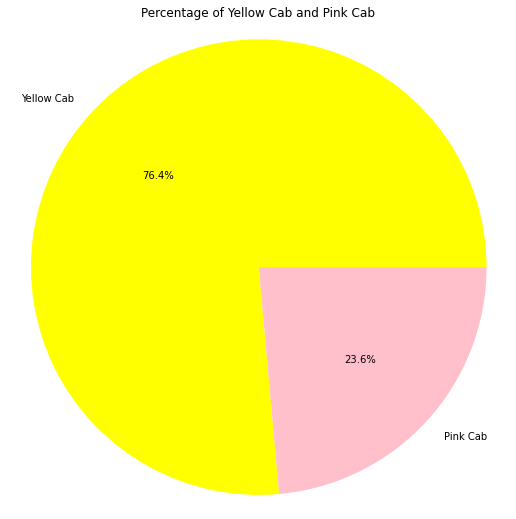

In [27]:
company_data = merged_df['Company']

# Counting the occurrences of each company
company_counts = company_data.value_counts()

# Calculating the percentages
total_count = len(company_data)
yellow_cab_percentage = (company_counts['Yellow Cab'] / total_count) * 100
pink_cab_percentage = (company_counts['Pink Cab'] / total_count) * 100

plt.figure(figsize=(9, 9))

# Plotting the pie chart
companies = ['Yellow Cab', 'Pink Cab']
percentages = [yellow_cab_percentage, pink_cab_percentage]
colors = ['yellow', 'pink']

plt.pie(percentages, labels=companies, colors=colors, autopct='%1.1f%%')


plt.title('Percentage of Yellow Cab and Pink Cab')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [28]:
# Checking values
yellow_cab_count = merged_df['Company'].value_counts()['Yellow Cab']
pink_cab_count = merged_df['Company'].value_counts()['Pink Cab']
sum_cab = yellow_cab_count + pink_cab_count

print("Number of times 'Yellow Cab' appears:", yellow_cab_count)
print("Number of times 'Pink Cab' appears:", pink_cab_count)
print("Percentage of yellow cabs is " , yellow_cab_count/sum_cab*100)
print("Percentage of pink cabs is " , pink_cab_count/sum_cab*100)

Number of times 'Yellow Cab' appears: 274681
Number of times 'Pink Cab' appears: 84711
Percentage of yellow cabs is  76.4293584720862
Percentage of pink cabs is  23.57064152791381


## Users - Cities 

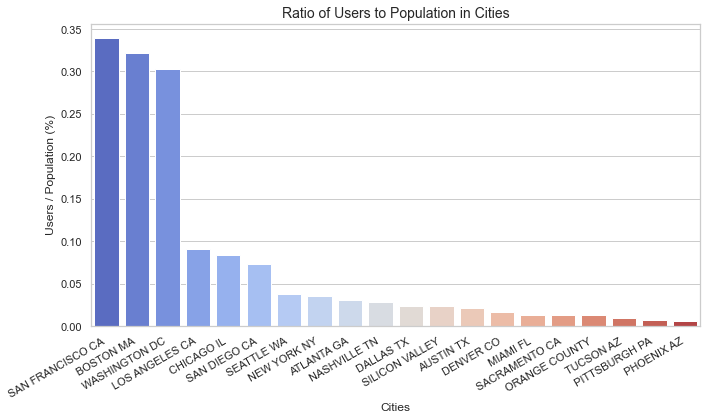

In [29]:
users = city_df['Users']
population = city_df['Population']
cities = city_df['City']

city_df['Users_to_Population'] = users / population

# Sorting the DataFrame by the ratio in descending order
df_sorted = city_df.sort_values('Users_to_Population', ascending=False)
sns.set(style="whitegrid")

# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.title('Ratio of Users to Population in Cities', fontsize=14)
sns.barplot(x='City', y='Users_to_Population', data=df_sorted, palette='coolwarm')
plt.xlabel('Cities', fontsize=12)
plt.ylabel('Users / Population (%)', fontsize=12)
plt.gcf().autofmt_xdate()


plt.tight_layout()
plt.show()




As shown from the bar chart: 

- San Francisco, Boston and Washington DC all have the highest user percentage by a significant margin with all of them having a user percentage of 30%
- The next highest group with a user percentage between 5-10% being: Los Angeles, Chicago and San Diego 
- The rest of the other cities all have a user percentage below 4%, showing the untapped potential of these markets.

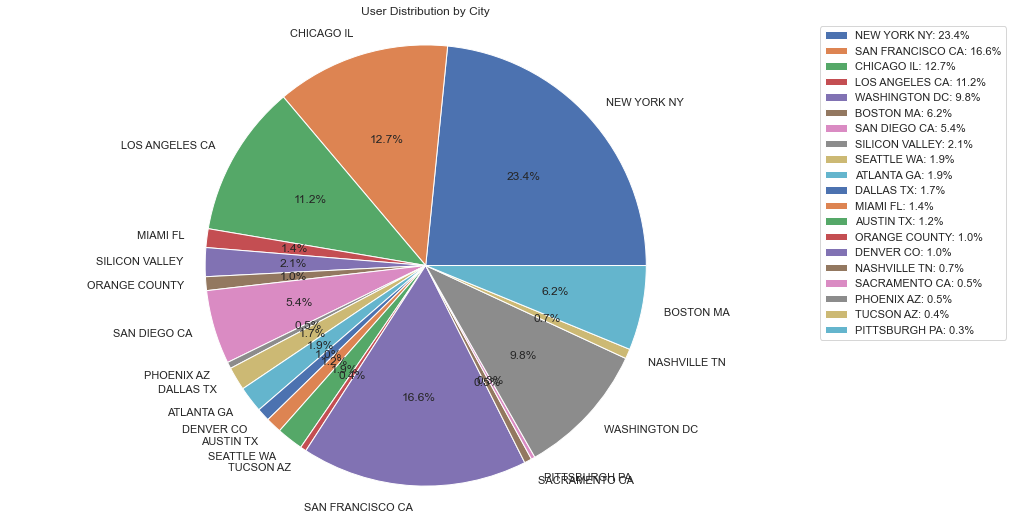

In [30]:
city_distribution_piechart = plt.figure(figsize=(15, 9))
plt.pie(users, labels=cities, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('User Distribution by City')

# Adding percentage labels
total_users = sum(users)
percentages = [(user / total_users) * 100 for user in users]

labels = ['{0}: {1:1.1f}%'.format(city, percent) for city, percent in zip(cities, percentages)]
labels = [label for _, label in sorted(zip(percentages, labels), reverse=True)]
legend = plt.legend(labels, loc='best', bbox_to_anchor=(1.2, 1))

plt.show()

In [31]:
users_array = np.array(users/users.sum())
print(users_array)

[0.23414907 0.12745377 0.11169447 0.01369717 0.02111495 0.01006964
 0.05424232 0.00475274 0.01717047 0.01914193 0.0096256  0.01160714
 0.01942246 0.00442649 0.16553538 0.00545872 0.00282313 0.09841888
 0.00718375 0.06201193]


As shown from this pie chart, cities with the highest users as of now are: New York with 23.4%, San Francisco with 16.6% and Chicago with 12.7%.

## User - Gender Differences

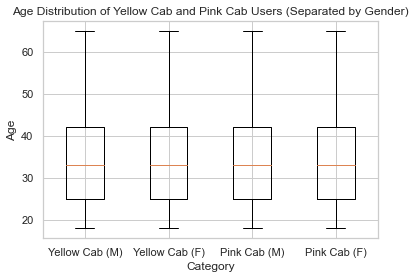

In [32]:
# Extracting the age and gender columns for 'Yellow Cab' and 'Pink Cab'
yellow_cab_data = merged_df[merged_df['Company'] == 'Yellow Cab']
pink_cab_data = merged_df[merged_df['Company'] == 'Pink Cab']

yellow_cab_male_age = yellow_cab_data[yellow_cab_data['Gender'] == 'Male']['Age']
yellow_cab_female_age = yellow_cab_data[yellow_cab_data['Gender'] == 'Female']['Age']
pink_cab_male_age = pink_cab_data[pink_cab_data['Gender'] == 'Male']['Age']
pink_cab_female_age = pink_cab_data[pink_cab_data['Gender'] == 'Female']['Age']

# Creating the box plots
cab_age_data = [yellow_cab_male_age, yellow_cab_female_age, pink_cab_male_age, pink_cab_female_age]
cab_age_labels = ['Yellow Cab (M)', 'Yellow Cab (F)', 'Pink Cab (M)', 'Pink Cab (F)']

plt.boxplot(cab_age_data, labels=cab_age_labels)
plt.xlabel('Category')
plt.ylabel('Age')
plt.title('Age Distribution of Yellow Cab and Pink Cab Users (Separated by Gender)')
plt.show()

In [33]:
yellow_cab_male_age.describe()


count    158681.000000
mean         35.376189
std          12.564771
min          18.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          65.000000
Name: Age, dtype: float64

In [34]:
yellow_cab_female_age.describe()


count    116000.000000
mean         35.293129
std          12.597448
min          18.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          65.000000
Name: Age, dtype: float64

In [35]:
pink_cab_male_age.describe()


count    47231.000000
mean        35.363596
std         12.607969
min         18.000000
25%         25.000000
50%         33.000000
75%         42.000000
max         65.000000
Name: Age, dtype: float64

In [36]:
pink_cab_female_age.describe()

count    37480.000000
mean        35.270518
std         12.690993
min         18.000000
25%         25.000000
50%         33.000000
75%         42.000000
max         65.000000
Name: Age, dtype: float64

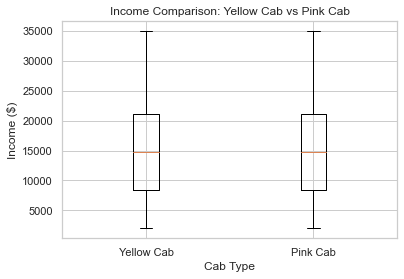

In [38]:
yellow_cab__income = merged_df[merged_df['Company'] == 'Yellow Cab']['Income (USD/Month)']

# Pink cab income
pink_cab_income = merged_df[merged_df['Company'] == 'Pink Cab']['Income (USD/Month)']

# Combined income data 
income_data = [yellow_cab__income, pink_cab_income]

# Plotting
plt.boxplot(income_data, labels=['Yellow Cab', 'Pink Cab'])
plt.title('Income Comparison: Yellow Cab vs Pink Cab')
plt.xlabel('Cab Type')
plt.ylabel('Income ($)')
plt.show()

As shown from the above graph, the average age for all demographics appears to be around 35 years old, with similar distributions. Similarly, the average income of users of both companies appear to be identical: $15000.

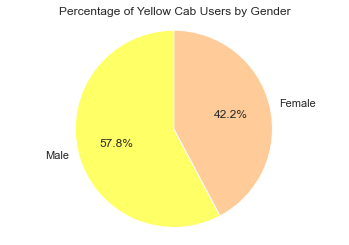

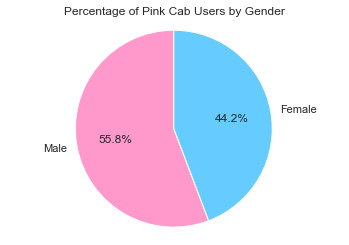

In [39]:
yellow_cab_gender = merged_df[merged_df['Company'] == 'Yellow Cab']['Gender']
pink_cab_gender = merged_df[merged_df['Company'] == 'Pink Cab']['Gender']

# Calculating the percentage for each category
yellow_cab_gender_percentage = yellow_cab_gender.value_counts(normalize=True) * 100
pink_cab_gender_percentage = pink_cab_gender.value_counts(normalize=True) * 100

labels = yellow_cab_gender_percentage.index
yellow_cab_sizes = yellow_cab_gender_percentage.values
pink_cab_sizes = pink_cab_gender_percentage.values
fig, ax = plt.subplots()

# Plotting
ax.pie(yellow_cab_sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#FFFF66', '#FFCC99'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax.set_title('Percentage of Yellow Cab Users by Gender')
plt.show()

fig, ax = plt.subplots()
# Plotting the pie chart for Pink Cab
ax.pie(pink_cab_sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#FF99CC', '#66CCFF'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax.set_title('Percentage of Pink Cab Users by Gender')
plt.show()

Both cab companies appear to have a similar gender make-up with differences being up to 2%.

## User - Other  

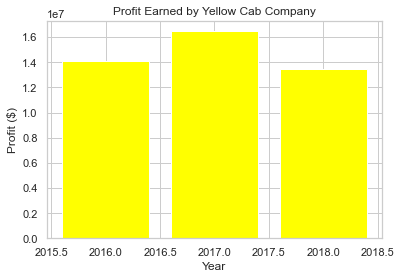

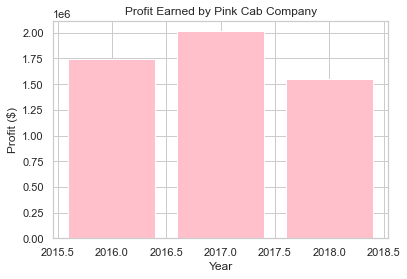

In [40]:
# Profit
merged_df['Profit'] = merged_df['Price Charged'] - merged_df['Cost of Trip']

# Year
merged_df['Year'] = pd.to_datetime(merged_df['Date of Travel']).dt.year

# Total profit by year and company 
grouped_year_company_df = merged_df.groupby(['Year', 'Company'])['Profit'].sum().reset_index()

# Profit for cabs
yellow_cab_year_profit = grouped_year_company_df[grouped_year_company_df['Company'] == 'Yellow Cab']
pink_cab_year_profit = grouped_year_company_df[grouped_year_company_df['Company'] == 'Pink Cab']

# Removing decimal years
yellow_cab_year_profit = yellow_cab_year_profit[~yellow_cab_year_profit['Year'].isin([2015.5, 2016.5, 2017.5, 2018.5])]
pink_cab_year_profit = pink_cab_year_profit[~pink_cab_year_profit['Year'].isin([2015.5, 2016.5, 2017.5, 2018.5])]

# Plotting
plt.bar(yellow_cab_year_profit['Year'], yellow_cab_year_profit['Profit'], color='yellow')
plt.xlabel('Year')
plt.ylabel('Profit ($)')
plt.title('Profit Earned by Yellow Cab Company')
plt.show()

plt.bar(pink_cab_year_profit['Year'], pink_cab_year_profit['Profit'], color='pink')
plt.xlabel('Year')
plt.ylabel('Profit ($)')
plt.title('Profit Earned by Pink Cab Company')
plt.show()

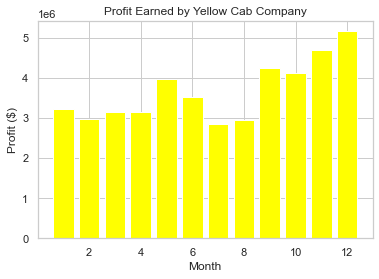

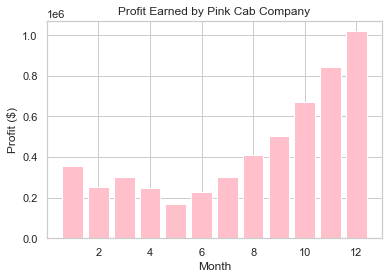

In [41]:
# Extracting month
merged_df['Month'] = pd.to_datetime(merged_df['Date of Travel']).dt.month

# Total profit by month and company 
grouped_month_company_df = merged_df.groupby(['Month', 'Company'])['Profit'].sum().reset_index()

# Profit 
yellow_cab_month_profit = grouped_month_company_df[grouped_month_company_df['Company'] == 'Yellow Cab']
pink_cab_month_profit = grouped_month_company_df[grouped_month_company_df['Company'] == 'Pink Cab']

# Plotting 
plt.bar(yellow_cab_month_profit['Month'], yellow_cab_month_profit['Profit'], color='yellow')
plt.xlabel('Month')
plt.ylabel('Profit ($)')
plt.title('Profit Earned by Yellow Cab Company')
plt.show()

plt.bar(pink_cab_month_profit['Month'], pink_cab_month_profit['Profit'], color='pink')
plt.xlabel('Month')
plt.ylabel('Profit ($)')
plt.title('Profit Earned by Pink Cab Company')
plt.show()

In [42]:
yellow_cab_month_profit['Profit'].describe()

count    1.200000e+01
mean     3.668364e+06
std      7.574590e+05
min      2.851912e+06
25%      3.109159e+06
50%      3.375599e+06
75%      4.142045e+06
max      5.164226e+06
Name: Profit, dtype: float64

In [43]:
pink_cab_month_profit['Profit'].describe()

count    1.200000e+01
mean     4.422774e+05
std      2.681951e+05
min      1.697383e+05
25%      2.519242e+05
50%      3.289943e+05
75%      5.469425e+05
max      1.019918e+06
Name: Profit, dtype: float64

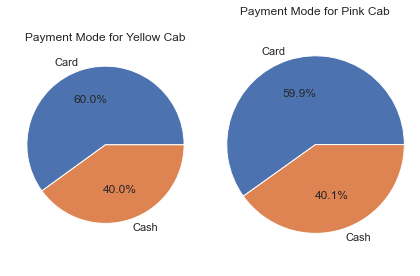

In [44]:
# Subset the data for Yellow Cab and Pink Cab
yellow_cab_data = merged_df[merged_df['Company'] == 'Yellow Cab']
pink_cab_data = merged_df[merged_df['Company'] == 'Pink Cab']

# Count the number of 'Card' and 'Cash' payments for Cabs
yellow_cab_payment_counts = yellow_cab_data['Payment_Mode'].value_counts()
pink_cab_payment_counts = pink_cab_data['Payment_Mode'].value_counts()

# Plotting 
plt.subplot(1, 2, 1)
plt.pie(yellow_cab_payment_counts, labels=yellow_cab_payment_counts.index, autopct='%1.1f%%')
plt.title('Payment Mode for Yellow Cab')

plt.subplot(1, 2, 2)
plt.pie(pink_cab_payment_counts, labels=pink_cab_payment_counts.index, autopct='%1.1f%%')
plt.title('Payment Mode for Pink Cab')
plt.axis('equal')
plt.tight_layout()
plt.show()

Payment modes for both cab companies appear to be nearly identical with a difference of just 0.1%

# Hypothesis testing 

Although data analysis has been done to make sense of the data being provided, some formal conclusion still remains to be drawn in order to make sound business decisions. Hence, hypothesis testing will be done on several hypotheses for this purpose. 

## Hypothesis 1: Is there a significance difference in profit based on gender?

H0: There is no significant difference in profit based on gender\
H1: There is a significant difference in profit based on gender

### Yellow Cab

In [63]:
yellow_cab_data = merged_df[merged_df['Company'] == 'Yellow Cab']
pink_cab_data = merged_df[merged_df['Company'] == 'Pink Cab']

# T-test for Yellow Cab
yellow_cab_male_profit = yellow_cab_data[yellow_cab_data['Gender'] == 'Male']['Profit']
yellow_cab_female_profit = yellow_cab_data[yellow_cab_data['Gender'] == 'Female']['Profit']
t_statistic_yellow1, p_value_yellow1 = stats.ttest_ind(yellow_cab_male_profit, yellow_cab_female_profit)

# Defining significance level
significance_level = 0.05


print("the p value for yellow cab is", p_value_yellow1)
if p_value_yellow1 < significance_level:
    print("Reject the null hypothesis for Yellow Cab. There is a significant difference in profit based on gender.")
else:
    print("Fail to reject the null hypothesis for Yellow Cab. There is no significant difference in profit based on gender.")



the p value for yellow cab is 6.060473042494056e-25
Reject the null hypothesis for Yellow Cab. There is a significant difference in profit based on gender.


### Pink Cab 

In [64]:
# T-test for Pink Cab
pink_cab_male_profit = pink_cab_data[pink_cab_data['Gender'] == 'Male']['Profit']
pink_cab_female_profit = pink_cab_data[pink_cab_data['Gender'] == 'Female']['Profit']
t_statistic_pink1, p_value_pink1 = stats.ttest_ind(pink_cab_male_profit, pink_cab_female_profit)

print("the p value for pink cab is", p_value_pink1)
if p_value_pink1 < significance_level:
    print("Reject the null hypothesis for Pink Cab. There is a significant difference in profit based on gender.")
else:
    print("Fail to reject the null hypothesis for Pink Cab. There is no significant difference in profit based on gender.")


the p value for pink cab is 0.11515305900425798
Fail to reject the null hypothesis for Pink Cab. There is no significant difference in profit based on gender.


## Hypothesis 2: Is there a significance difference in profit based on income?

H0: There is no signficant difference in profit based on income\
H1: There is a significant difference in profit based on income

### Yellow Cab

In [48]:
# t-test for Yellow Cab
t_statistic_yellow2, p_value_yellow2 = stats.ttest_ind(yellow_cab_data['Profit'], yellow_cab_data['Income (USD/Month)'])

# Compare p-value with significance level for Yellow Cab
print("the p value for yellow cab is", p_value_yellow2)
if p_value_yellow2 < significance_level:
    print("Reject the null hypothesis for Yellow Cab. There is a significant difference in profit based on income.")
else:
    print("Fail to reject the null hypothesis for Yellow Cab. There is no significant difference in profit based on income.")



the p value for yellow cab is 0.0
Reject the null hypothesis for Yellow Cab. There is a significant difference in profit based on income.


### Pink Cab

In [49]:
# t-test for Pink Cab
t_statistic_pink2, p_value_pink2 = stats.ttest_ind(pink_cab_data['Profit'], pink_cab_data['Income (USD/Month)'])

# Compare p-value with significance level for Pink Cab
print("the p value for pink cab is", p_value_pink2)
if p_value_pink2 < significance_level:
    print("Reject the null hypothesis for Pink Cab. There is a significant difference in profit based on income.")
else:
    print("Fail to reject the null hypothesis for Pink Cab. There is no significant difference in profit based on income.")


the p value for pink cab is 0.0
Reject the null hypothesis for Pink Cab. There is a significant difference in profit based on income.


## Hypothesis 3: Is there a significance difference in profit based on age?

H0: There is no signficant difference in profit based on age\
H1: There is a significant difference in profit based on age

### Yellow Cab

In [52]:
# t-test for Yellow Cab
t_statistic_yellow3, p_value_yellow3 = stats.ttest_ind(yellow_cab_data['Profit'], yellow_cab_data['Age'])


# Compare p-value with significance level for Yellow Cab
print("the p value for yellow cab is", p_value_yellow3)
if p_value_yellow3 < significance_level:
    print("Reject the null hypothesis for Yellow Cab. There is a significant difference in profit based on age.")
else:
    print("Fail to reject the null hypothesis for Yellow Cab. There is no significant difference in profit based on age.")

the p value for yellow cab is 0.0
Reject the null hypothesis for Yellow Cab. There is a significant difference in profit based on age.


### Pink Cab

In [51]:
# t-test for Pink Cab
t_statistic_pink3, p_value_pink3 = stats.ttest_ind(pink_cab_data['Profit'], pink_cab_data['Age'])

# Compare p-value with significance level for Pink Cab
print("the p value for pink cab is", p_value_pink3)
if p_value_pink3 < significance_level:
    print("Reject the null hypothesis for Pink Cab. There is a significant difference in profit based on age.")
else:
    print("Fail to reject the null hypothesis for Pink Cab. There is no significant difference in profit based on age.")


the p value for pink cab is 0.0
Reject the null hypothesis for Pink Cab. There is a significant difference in profit based on age.


## Hypothesis 4: Is there a significance difference in profit based on payment method?

H0: There is no signficant difference in profit based on payment method\
H1: There is a significant difference in profit based on payment method

### Yellow Cab

In [59]:
# Perform independent t-test for Yellow Cab
yellow_cab_card_profit = yellow_cab_data[yellow_cab_data['Payment_Mode'] == 'Card']['Profit']
yellow_cab_cash_profit = yellow_cab_data[yellow_cab_data['Payment_Mode'] == 'Cash']['Profit']
t_statistic_yellow4, p_value_yellow4 = stats.ttest_ind(yellow_cab_card_profit, yellow_cab_cash_profit)

# Compare p-value with significance level for Yellow Cab
print("the p value for yellow cab is", p_value_yellow4)
if p_value_yellow4 < significance_level:
    print("Reject the null hypothesis for Yellow Cab. There is a significant difference in profit based on payment method.")
else:
    print("Fail to reject the null hypothesis for Yellow Cab. There is no significant difference in profit based on payment method.")

the p value for yellow cab is 0.2933060638298338
Fail to reject the null hypothesis for Yellow Cab. There is no significant difference in profit based on payment method.


### Pink Cab 

In [60]:
# Perform independent t-test for Pink Cab
pink_cab_card_profit = pink_cab_data[pink_cab_data['Payment_Mode'] == 'Card']['Profit']
pink_cab_cash_profit = pink_cab_data[pink_cab_data['Payment_Mode'] == 'Cash']['Profit']
t_statistic_pink4, p_value_pink4 = stats.ttest_ind(pink_cab_card_profit, pink_cab_cash_profit)

# Compare p-value with significance level for Pink Cab
print("the p value for yellow cab is", p_value_pink4)
if p_value_pink4 < significance_level:
    print("Reject the null hypothesis for Pink Cab. There is a significant difference in profit based on payment method.")
else:
    print("Fail to reject the null hypothesis for Pink Cab. There is no significant difference in profit based on payment method.")

the p value for yellow cab is 0.7900465828792986
Fail to reject the null hypothesis for Pink Cab. There is no significant difference in profit based on payment method.


## Hypothesis 5: Is there a significance difference in profit between the Yellow and Pink Cab companies?

H0: There is no signficant difference in profit between the Yellow and Pink Cab companies?\
H1: There is a significant difference in profit between the Yellow and Pink Cab companies?

In [65]:
# Perform independent t-test for Yellow Cab and Pink Cab
t_statistic5, p_value = stats.ttest_ind(yellow_cab_data['Profit'], pink_cab_data['Profit'], equal_var=False)

# Compare p-value with significance level
print("The p value is",p_value)
if p_value < significance_level:
    print("Reject the null hypothesis. There is a significant difference in profit between Yellow Cab and Pink Cab.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in profit between Yellow Cab and Pink Cab.")


The p value is 0.0
Reject the null hypothesis. There is a significant difference in profit between Yellow Cab and Pink Cab.
